## <center>Matplotlib

In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,7

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('players.csv')
print(df.shape)

(3922, 8)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3922 non-null   int64  
 1   Player       3921 non-null   object 
 2   height       3921 non-null   float64
 3   weight       3921 non-null   float64
 4   collage      3573 non-null   object 
 5   born         3921 non-null   float64
 6   birth_city   3452 non-null   object 
 7   birth_state  3439 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 245.2+ KB


In [4]:
df = df.dropna()
#Проверка на повторение данных
len(df.Player.unique()) == df.shape[0]

True

In [5]:
df['born'] = df.born.astype('int64')
df.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921,Yorktown,Indiana
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927,Hardinsburg,Kentucky
6,6,Charlie Black,196.0,90.0,University of Kansas,1921,Arco,Idaho
7,7,Nelson Bobb,183.0,77.0,Temple University,1924,Philadelphia,Pennsylvania
8,8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927,New Brunswick,New Jersey


In [6]:
def find_weight_category(mass_index):
    if mass_index < 18.5:
        return 'дефицит массы тела'
    elif mass_index > 25.0:
        return 'избыточная масса тела'
    return 'норма'
        

In [7]:
# Уберём столбец Unnamed:0
df_1 = df.iloc[ : ,1 : ]
#Добавим столбцы с индексом массы тела и весовой категорией
df_1.loc[ : ,'mass_index'] = round(df_1.weight / (0.01 * df_1.height) ** 2, 2)
df_1['weight_categoty'] = df_1.mass_index.apply(find_weight_category)
df_1.head()

,Player,height,weight,collage,born,birth_city,birth_state,mass_index,weight_categoty
1,Cliff Barker,188.0,83.0,University of Kentucky,1921,Yorktown,Indiana,23.48,норма
4,Ralph Beard,178.0,79.0,University of Kentucky,1927,Hardinsburg,Kentucky,24.93,норма
6,Charlie Black,196.0,90.0,University of Kansas,1921,Arco,Idaho,23.43,норма
7,Nelson Bobb,183.0,77.0,Temple University,1924,Philadelphia,Pennsylvania,22.99,норма
8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927,New Brunswick,New Jersey,23.43,норма


### 1. Посмотрим на распределение игроков по дате рождения

Text(0, 0.5, 'players')

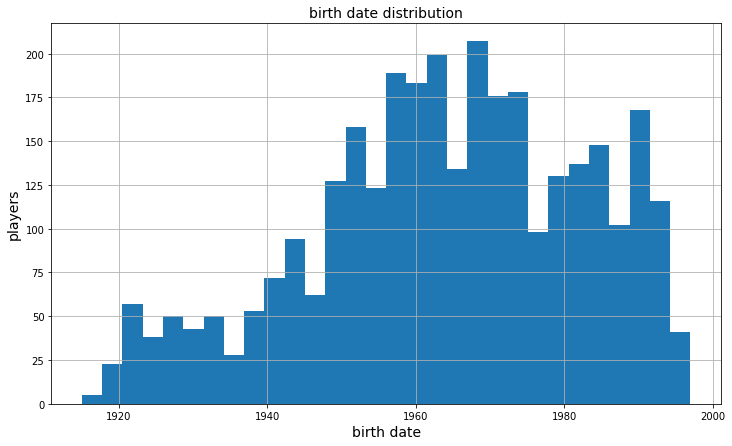

In [8]:
ax = df_1.born.hist(bins=30)
ax.set_title('birth date distribution', fontsize=14)
ax.set_xlabel('birth date', fontsize=14)
ax.set_ylabel('players', fontsize=14)

Больше всего игроков __`1960`__ года. Не хватает свежей статистики по молодёжи. Это было бы более актуальной информацией.

### 2. Оценим количество игроков с избыточным весом и весом ниже нормы. Насколько сидячий образ жизни влияет на этот показатель?

In [9]:
players_weight_stat = df_1.weight_categoty.value_counts(normalize=True)
players_weight_stat.head()

норма                    0.782377
избыточная масса тела    0.217310
дефицит массы тела       0.000314
Name: weight_categoty, dtype: float64

*__`Не знаю как исключить из этого графика людей с дефицитом массы тела?`__*

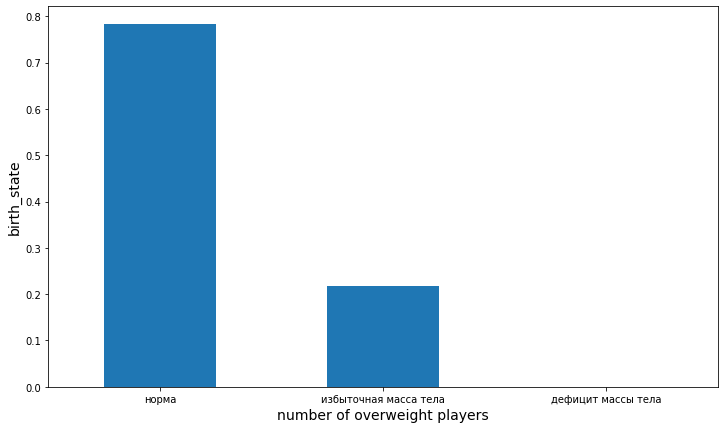

In [10]:
players_weight_stat.plot(kind='bar', rot=0)
plt.xlabel('number of overweight players', fontsize=14)
plt.ylabel('birth_state', fontsize=14)
plt.savefig('players_weight_stat.png')

Данный пример демонстрирует, что сидячий образ жизни и работа (времяпрепровождение за компьютером) далеко не всегда приводит к ожирению. Согласно статистике лишь около __`21,7%`__ компьютерных игроков имеют проблеммы с лишним весом. Дефицит массы тела из-за недостатка физической активности или нерегулярного питания у игроков наблюдался в единичных случаях (около __`0,03%`__).

**То же самое, но в другом виде.**

In [11]:
players_weight_stat = df_1.groupby('weight_categoty').count().sort_values('Player', ascending=False)
players_weight_stat['mass_categories_rate'] = 100*players_weight_stat.Player/players_weight_stat.Player.sum()
players_weight_stat[['mass_categories_rate']].style.bar()

,mass_categories_rate
weight_categoty,
норма,78.237692
избыточная масса тела,21.730950
дефицит массы тела,0.031358


### 3. Составим ТОП-10 штатов с максимальным количеством игроков с повышенным индексом массы тела.

In [12]:
top_states_with_overweight = df_1[df_1.weight_categoty=='избыточная масса тела'].groupby('birth_state').count()\
    .sort_values('Player', ascending=False).reset_index().head(10)
top_states_with_overweight

,birth_state,Player,height,weight,collage,born,birth_city,mass_index,weight_categoty
0,California,68,68,68,68,68,68,68,68
1,New York,60,60,60,60,60,60,60,60
2,Illinois,47,47,47,47,47,47,47,47
3,Texas,35,35,35,35,35,35,35,35
4,Ohio,28,28,28,28,28,28,28,28
5,Michigan,28,28,28,28,28,28,28,28
6,Georgia,26,26,26,26,26,26,26,26
7,Pennsylvania,23,23,23,23,23,23,23,23
8,New Jersey,22,22,22,22,22,22,22,22
9,Louisiana,22,22,22,22,22,22,22,22


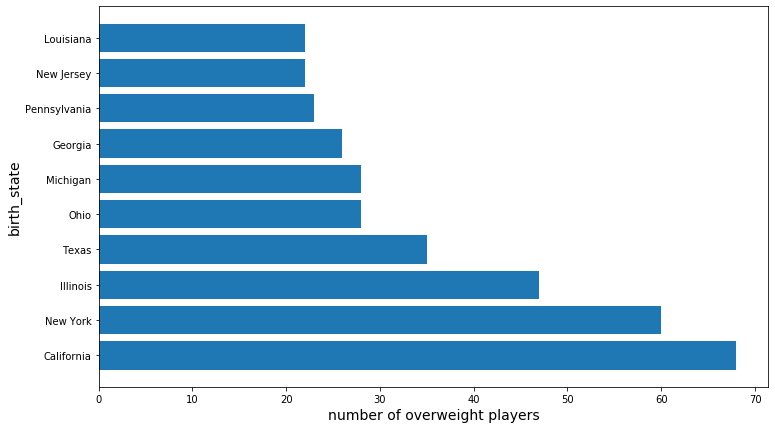

In [13]:
plt.barh(top_states_with_overweight['birth_state'], top_states_with_overweight['Player'])
plt.xlabel('number of overweight players', fontsize=14)
plt.ylabel('birth_state', fontsize=14)
plt.savefig('top_states_with_overweight.png')

### 4. Подробнее рассмотрим взаимосвязь двух численных признаков, таких как __`дата рождения`__ и __`индекс массы тела`__.

In [14]:
import seaborn as sns

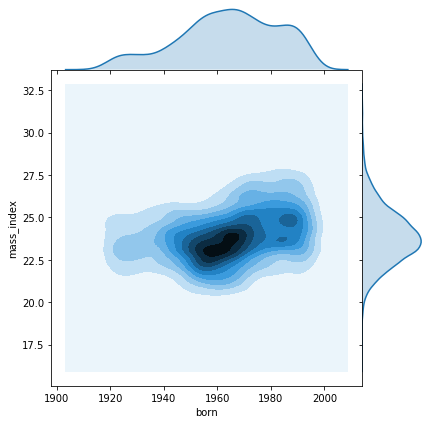

In [15]:
sns.jointplot(x='born', y='mass_index', data=df_1, 
              kind='kde', space=0)

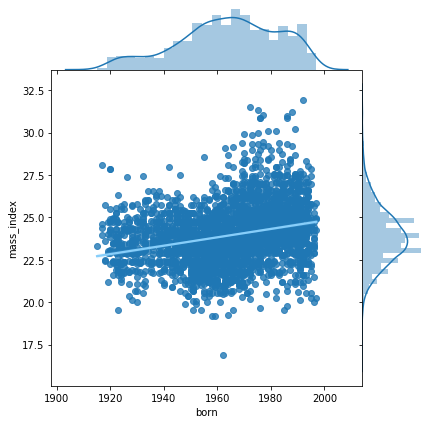

In [16]:
sns.jointplot('born', 'mass_index', data=df_1, 
              kind='reg', space=0, joint_kws={'line_kws':{'color':'lightskyblue'}})

У младшего поколения игроков наблюдается тенденция к увеличению индекса массы тела. При этом распределение людей с нормальным и повышенным индексом массы тела становится более равномерным. 

### 5. Построим __`box plot`__ распределения индекса массы для ТОП-10 штатов с максимальным количеством игроков с повышенным индексом массы тела. 

In [17]:
# top_states_with_overweight = df_1[df_1.weight_categoty == 'избыточная масса тела'].groupby('birth_state').count()\
#     .sort_values('Player', ascending=False).head(10).index.values
# # top_states_with_overweight
# for state in top_states_with_overweight:
#     df_1[df_1.birth_state.str.contains(state)].mass_index.plot(kind='box')

*__`Пока не разобрался как строить box plot c помощью Matplotlib? С помощью классов?`__*

Построим __`boxplot`__ распределения индекса массы для ТОП-10 штатов с максимальным количеством игроков с повышенным индексом массы тела с использованием библиотеки **Seaborn**. 

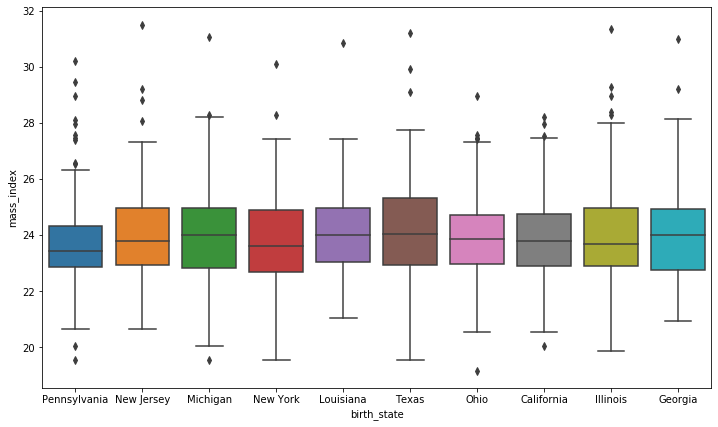

In [18]:
top_states_with_overweight = df_1[df_1.weight_categoty == 'избыточная масса тела'].groupby('birth_state').count()\
    .sort_values('Player', ascending=False).head(10).index.values
# top_states_with_overweight
ax = sns.boxplot(x="birth_state", y="mass_index", 
            data=df_1[df_1.birth_state.isin(top_states_with_overweight)])

### 6. Определим 10 колледжей, в которых обучается (или обучалось) наибольшее количество зарегистрированных игроков.

In [19]:
players_collage_stat = df_1.collage.value_counts().head(10)
players_collage_stat

University of Kentucky                   84
University of California, Los Angeles    84
University of North Carolina             65
University of Kansas                     58
Duke University                          54
Syracuse University                      43
St. John's University                    43
Michigan State University                43
University of Notre Dame                 43
Indiana University                       42
Name: collage, dtype: int64

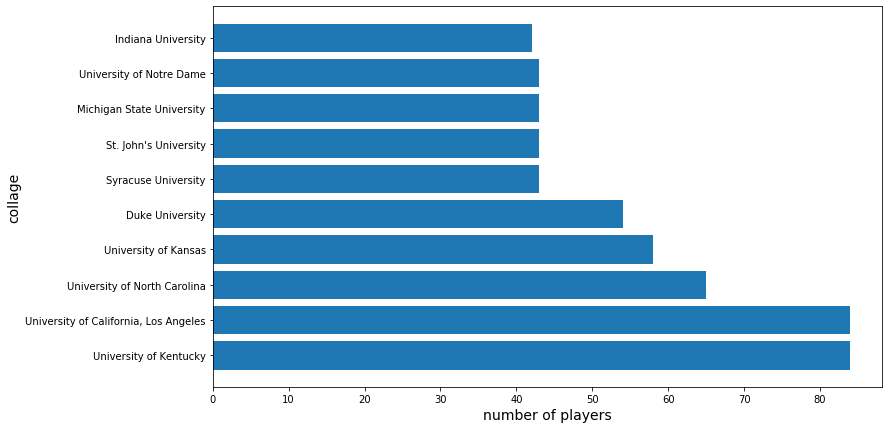

In [20]:
plt.barh(players_collage_stat.index, players_collage_stat)
plt.xlabel('number of players', fontsize=14)
plt.ylabel('collage', fontsize=14)
plt.savefig('players_collage_stat.png')